# Gradient Descent

### Gradient Descent Regression

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from IPython.display import clear_output

In [5]:
np.random.seed(0)

## Data
X = np.array(list(range(1,11))).reshape(-1,1)
y = np.array([3*n for n in range(10)]) + np.random.normal(0,1,10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state = 0)

In [23]:
X = X_train
y = y_train

## Design Matrix
XD = np.c_[np.ones(X.shape[0]), X]

## Hyperparameters
learning_rate = 0.0001
num_iter = 10000

## Gradient Descent
w_cur = np.random.normal(0,1,2)
N = len(y) 

for j in range(num_iter):
    clear_output(wait = True) # It will only clear once it goes back to this portion of the loop
        
    gradient = np.zeros_like(w_cur) # Number of zeros the same as w_cur
    
    y_pred = XD.dot(w_cur) # Calculate y using the current weights
    
    if (j+1) % 100 == 0:
        print(f"Current Iteration: {j + 1}/{num_iter}")
        print(f"Current Loss:L {mean_squared_error(y, y_pred)}")
        
    for i in range(N):
        grad_0 = -1 / N * sum(y - y_pred)
        grad_1 = -1 / N * sum(X.T.dot(y - y_pred)) 
        gradient += np.array([grad_0, grad_1])
        
    w_cur -= gradient * learning_rate    
    
clear_output()
print(f"Weights: {w_cur}")

Weights: [-1.20369564  2.8212887 ]


In [9]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print(f"[{model.intercept_}, {model.coef_[0]}]") # Should be the same/similar as above

[-1.3105001099203442, 2.8369468245195097]


Potential Danger for Gradient Descent: Finds Local Minimum Instead

In [20]:
np.random.seed(0)

## Hyperparameters
learning_rate = 0.0001
num_iter = 10000

## Gradient Descent
x_cur = np.random.uniform(0,3) 

for j in range(num_iter):
    clear_output(wait = True) # It will only clear once it goes back to this portion of the loop
        
    gradient = 4 * x_cur ** 3 - 9 * x_cur ** 2 + 1
    
    x_cur -= gradient * learning_rate
    
clear_output()
print(f"x: {x_cur}")

x: 2.1982655564761906


#### Ways to adress the pitfalls of Gradient Descent
- Stochastic Gradient Descent
- Mini-batch Gradient Descent

### Gradient Descent for Polynomial Regression

In [25]:
import matplotlib.pyplot as plt

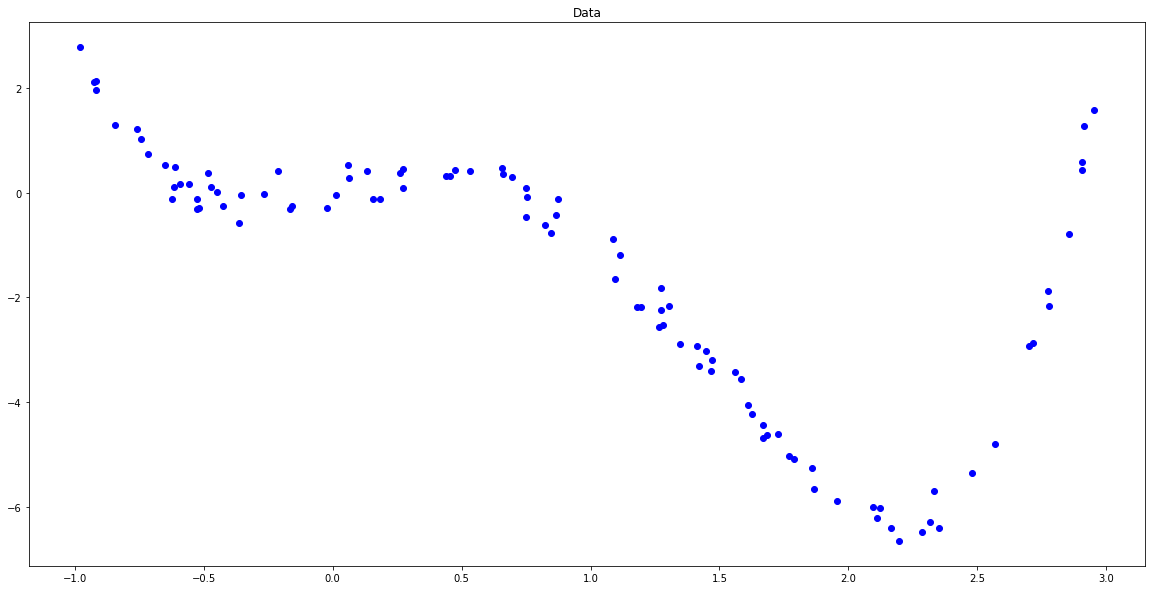

In [27]:
np.random.seed(0)

X = np.random.uniform(-1, 3, 100)

xs = []
ys = []

for x in X:
    y = x ** 4 - 3 * x ** 3 + x + np.random.normal(0, 0.25)
    xs += [x]
    ys += [y]
    
plt.figure(figsize = (20, 10))
plt.plot(xs, ys, "bo")
plt.title("Data")
plt.show()

## Hyperparameters
learning_rate = 0.0001
num_iter = 10000

# Try to do it ermm

Target weights:
   - w_0 = 0
   - w_1 = 1
   - w_2 = 0
   - w_3 = -3
   - w_4 = 1